In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

sns.set_theme(context='notebook', style='whitegrid', palette='deep')

Load the data.

In [2]:
df1 = pd.read_csv('../outputs/mid001.csv')
df2 = pd.read_csv('../outputs/mid002.csv')
df3 = pd.read_csv('../outputs/mid003.csv')

df = pd.concat([df1, df2, df3], axis=0)

Preprocess

In [3]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['date'] = df['datetime'].dt.date
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

Plot daily sales by product

<Axes: xlabel='date', ylabel='count'>

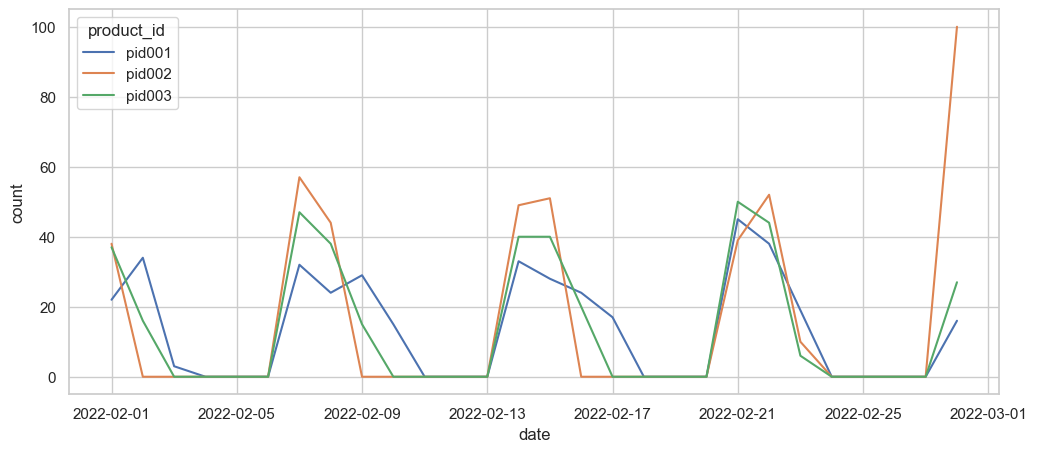

In [4]:
# Summarise sales count by day
df_daily_product = df.groupby(['date', 'product_id'])['count'].sum().reset_index()
df_daily_product.set_index('date', inplace=True)

fig, ax = plt.subplots(figsize=(12, 5))
df_daily_subset = df_daily_product.loc[date(2022,2,1):date(2022,2,28)].reset_index()
sns.lineplot(data=df_daily_subset, x='date', y='count', hue='product_id', ax=ax)

Plot daily sales by machine

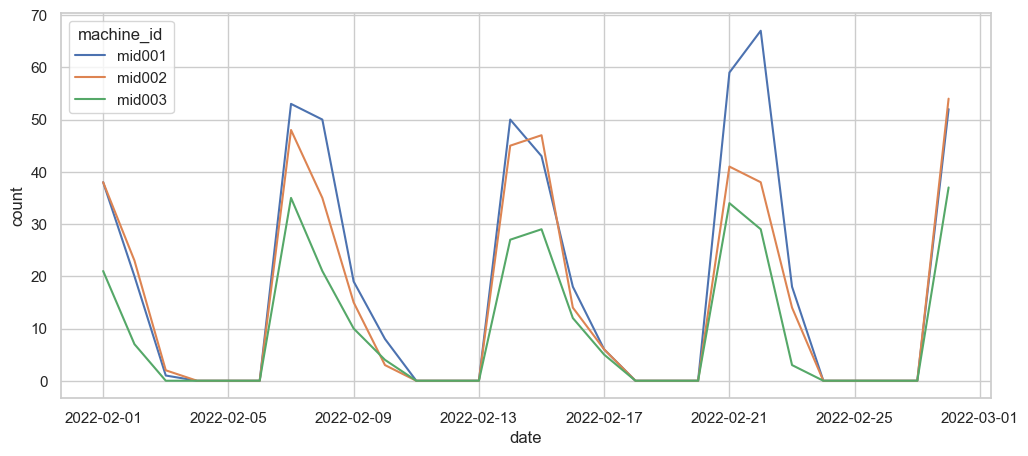

In [5]:
df_daily_machine = df.groupby(['date', 'machine_id'])['count'].sum().reset_index()
df_daily_machine.set_index('date', inplace=True)

fig, ax = plt.subplots(figsize=(12, 5))
df_daily_machine_subset = df_daily_machine.loc[date(2022,2,1):date(2022,2,28)].reset_index()
sns.lineplot(data=df_daily_machine_subset, x='date', y='count', hue='machine_id', ax=ax)

plt.show()

Append price data

In [6]:
df_drinks = pd.read_csv('../outputs/drink_master.csv')

In [7]:
df_daily_product.reset_index(inplace=True)

In [8]:
df_daily_product = df_daily_product.merge(df_drinks, how='left', on='product_id')
df_daily_product['sales'] = df_daily_product['count'] * df_daily_product['price']

In [9]:
df_daily_product['date'] = pd.to_datetime(df_daily_product['date'])
df_daily_product['year_month'] = df_daily_product['date'].dt.to_period('M')
df_monthly_product = df_daily_product.groupby(['year_month', 'product_name'])['sales'].sum().reset_index()
df_monthly_product['year_month'] = pd.to_datetime(df_monthly_product['year_month'].astype(str))

<Axes: xlabel='year_month', ylabel='sales'>

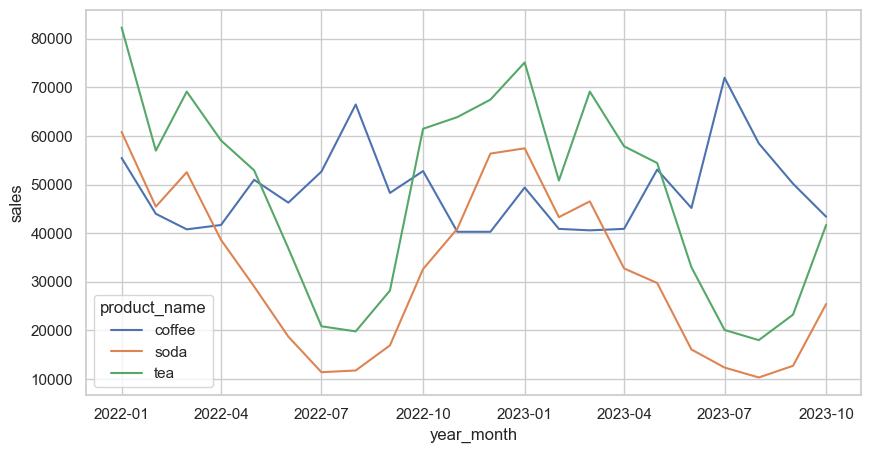

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x='year_month', y='sales', hue='product_name', data=df_monthly_product, ax=ax)